# Distributions univariées et multivariées

In [1]:
import openturns as ot
import math
import numpy as np
import openturns.viewer as otv
import pylab as plt

## Solution de l'exercice 1 : loi beta

In [2]:
myBeta = ot.Beta(5.0, 2.0, 9.0, 10.0)
myBeta.isContinuous()

True

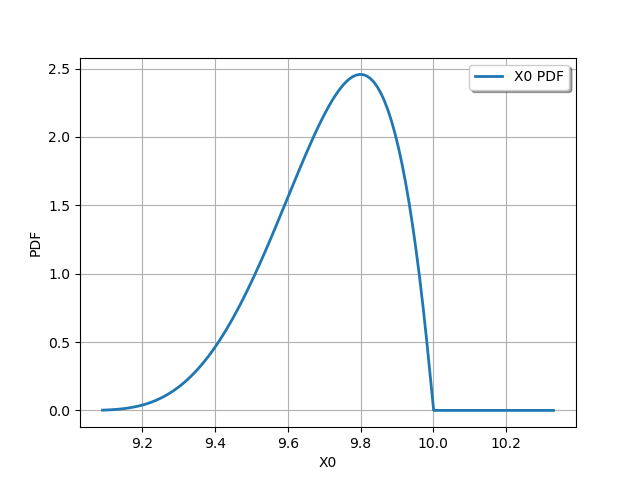

In [3]:
myBeta.drawPDF()

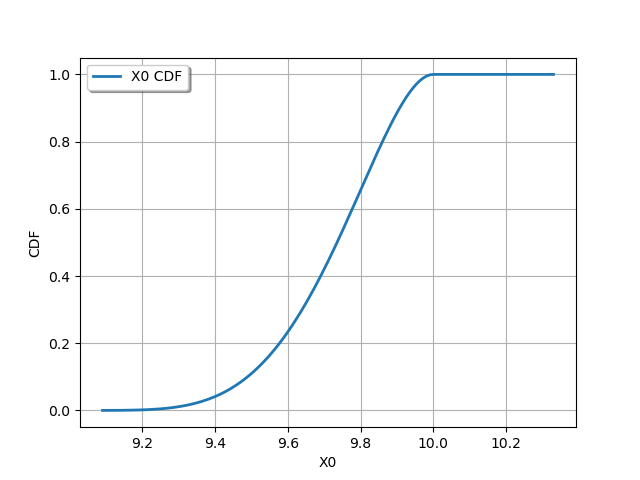

In [4]:
myBeta.drawCDF()

## Solution de l'exercice 2 : loi exponentielle

On remarque que la loi exponentielle d'OpenTURNS peut utiliser un paramètre de localisation $\gamma$ (par défaut $\gamma=0)$.

In [5]:
myExponential = ot.Exponential(3.0)
myExponential.isContinuous()

True

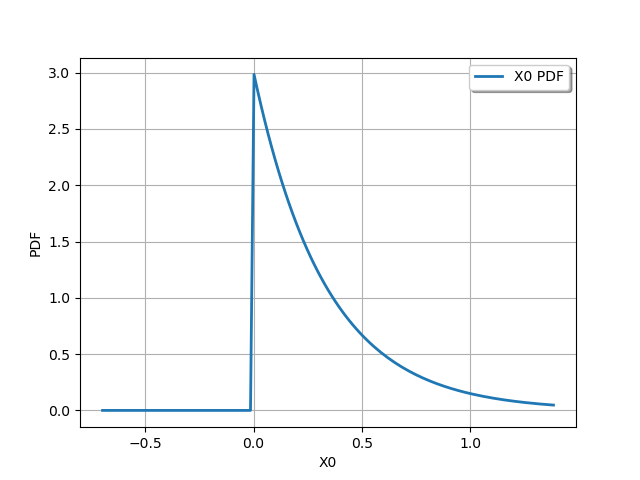

In [6]:
myExponential.drawPDF()

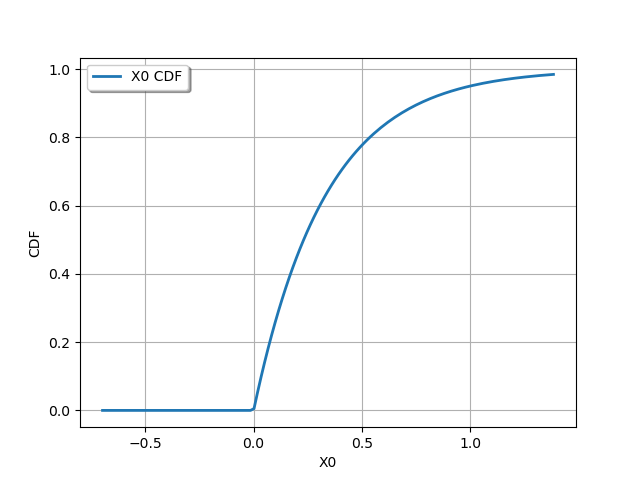

In [7]:
myExponential.drawCDF()

## Solution de l'exercice 3 : une variable de Bernoulli

In [8]:
u = ot.Bernoulli(0.7)
u.getSupport()

,v0
0,0
1,1


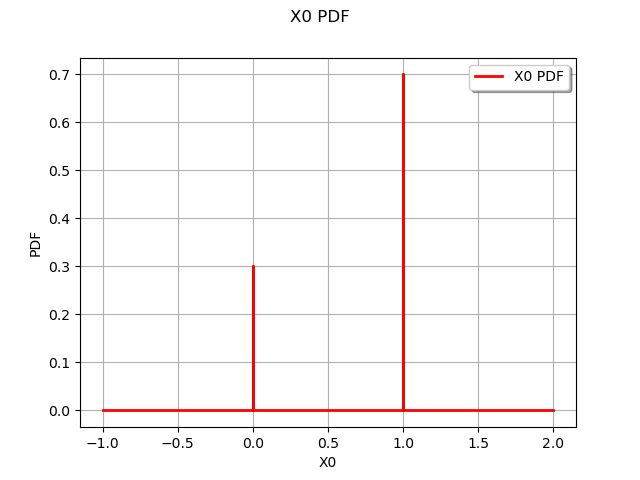

In [9]:
u.drawPDF()

In [10]:
u.isContinuous()

False

## Solution de l'exercice 4 : défaillance de disques


Si $X$ est le nombre de disques défectueux dans un paquet, alors, en supposant que les clients font toujours jouer la garantie, il s'ensuit que $X$ est une variable aléatoire binomiale de paramètres (10, 0.01). Par conséquent, la probabilité qu'un paquet doive être remplacé est $p = \mathbb{P}(X > 1) = 0.004266$.

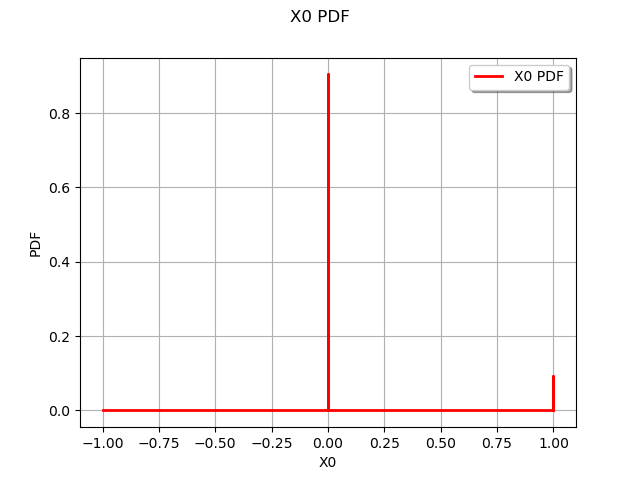

In [11]:
defectBinomial = ot.Binomial(10, 0.01)
defectBinomial.drawPDF()

In [12]:
p = defectBinomial.computeComplementaryCDF(1)
p

0.004266200242831419

Puisque chaque paquet devra, indépendamment, être remplacé avec une probabilité $p$, il découle de la loi des grands nombres que, sur le long terme, $p$ pour cent des paquets devront être remplacés.

Il découle de ce qui précède que le nombre de paquets que la personne devra retourner est une variable aléatoire binomiale de paramètres $n = 3$ et $p$. Par conséquent, la probabilité qu'exactement un des trois paquets soit retourné est 0.01269.

In [13]:
returnBinomial = ot.Binomial(3, p)
returnBinomial.computePDF(1)

0.012689630881901

## Solution de l'exercice 5 : pluviosité à Los Angeles


Soit $X$ la variable aléatoire correspondant à la précipitation annuelle en pouces. Par hypothèse, la variable $X$ est une variable gaussienne de moyenne 12.08 et d'écart-type 3.1. La probabilité d'observer une précipitation supérieure à 15 pouces est $\mathbb{P}(X>15) = 0.1731$.

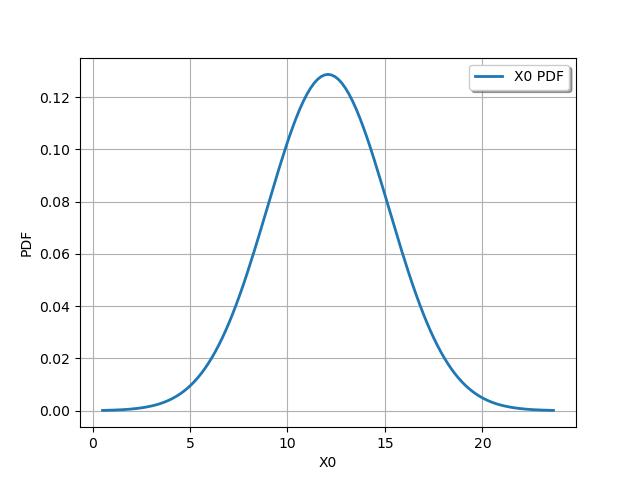

In [14]:
x = ot.Normal(12.08, 3.1)
x.drawPDF()

In [15]:
x.computeComplementaryCDF(15.0)

0.17311283588095566

Soient $X_1$ et $X_2$ les cumuls de précipitations pour les deux prochaines années. La variable aléatoire associée à la précipitation cumulée sur deux années est donc $Y = X_1 + X_2$. On souhaite calculer $\mathbb{P}(X_1 + X_2 > 25)$. Nous pouvons directement utiliser l'arithmétique des distributions. Ici, la loi de $Y = X_1 + X_2$ est une gaussienne car $X_1$ et $X_2$ sont deux variables aléatoires de loi gaussienne et indépendantes. Par conséquent, la loi de $Y$ est une gaussienne de moyenne $2\mu$ et de variance $2 \sigma^2$.

**Remarque 1.** (Somme de variables aléatoires gaussiennes indépendantes) Soient $(X_i)_{1 \leq i \leq n}$ une collection de variables aléatoires gaussiennes indépendantes de moyennes $(\mu_i)_{1 \leq i \leq n}$ et d'écart-types $(\sigma_i)_{1 \leq i \leq n}$. On considère la variable aléatoire associée à la somme $Y = \sum_{i = 1}^n X_i$, c'est-à-dire la somme des observations de $n$ variables aléatoires gaussiennes indépendantes. On peut démontrer (voir (Ross, 2004) page 173) que la somme de variables aléatoires gaussiennes indépendantes est une variable gaussienne de moyenne $\mu = \sum_{i = 1}^n \mu_i$ et de variance $\sigma^2 = \sum_{i = 1}^n \sigma_i^2$. Pour cela, on peut démontrer que la fonction génératrice des moments de la variable $Y$ est celle d'une loi gaussienne de moyenne $\mu$ et d'écart-type $\sigma$, ce qui spécifie entièrement la loi.

**Remarque 2.** (Mélange de lois gaussiennes) Soient $X_1$ et $X_2$ deux variables aléatoires gaussiennes indépendantes de densités $f_1$ et $f_2$. Soient $w_1 \geq 0$ et $w_2 \geq 0$ deux nombres réels tels que $w_1 + w_2 = 1$. Soit $Y$ la variable aléatoire dont la densité de probabilité est $f = w_1 f_1 + w_2 f_2$. Par définition, il s'agit d'un mélange de deux lois. Pour simuler une telle loi, on sélectionne aléatoirement la variable $X_1$ ou $X_2$ en tenant compte des poids $w_1$ et $w_2$. Puis on simule la variable aléatoire issue de la sélection. Dans ce cas, le mélange de deux lois gaussiennes n'est pas nécessairement une loi gaussienne. Si $\mu_1 \neq \mu_2$ alors la loi de mélange est multi-modale.

Le code suivant permet de créer une nouvelle variable aléatoire `y` comme la somme de deux variables aléatoires indépendantes.

**Remarque.** Le code ne crée **pas** la variable aléatoire `2x`. La bibliothèque fait l'hypothèse que les deux membres de l'opération `+` sont des variables indépendantes. Ici, on a écrit `x` de part et d'autre de l'opérateur `+`, mais la bibliothèque n'en tient pas compte : tout se passe comme s'il s'agissait de deux variables aléatoires informatiquement distinctes et mathématiquement indépendantes. 

In [16]:
y = x + x
print(y)

Normal(mu = 24.16, sigma = 4.38406)


In [17]:
y.computeComplementaryCDF(25)

0.4240265461378832

On obtient $\mathbb{P}(X_1 + X_2 > 25) = 0.4240$.

Le texte de Ross utilise une autre méthode. Il est fondé sur le calcul suivant. On suppose que 

$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = \mu
$$

et 

$$
\operatorname{Var}(X_1) = \operatorname{Var}(X_2) = \sigma^2
$$

où $\mu$ et $\sigma$ sont la moyenne et l'écart-type des variables gaussiennes $X_1$ et $X_2$. Les propriétés de la loi gaussienne impliquent que la moyenne et la variance sont :

\begin{align*}
\mathbb{E}[Y] &= \mathbb{E}[X_1 + X_2]= \mathbb{E}[X_1] + \mathbb{E}[X_2] = 2\mu \\
\operatorname{Var}(Y) &= \operatorname{Var}(X_1 + X_2)= \operatorname{Var}(X_1) + \operatorname{Var}(X_2) = 2\sigma^2,
\end{align*}

où la seconde égalité est justifiée par le faite que les variables sont indépendantes.

In [18]:
muX = 12.08
sigmaX = 3.1
varianceX = sigmaX**2
muY = 2 * muX
varianceY = 2 * varianceX
sigmaY = np.sqrt(varianceY)
print("muY = %f, sigmaY = %f" % (muY, sigmaY))

muY = 24.160000, sigmaY = 4.384062


In [19]:
y = ot.Normal(muY, sigmaY)
y.computeComplementaryCDF(25)

0.4240265461378832

On observe que, même si le calcul est plus complexe, le résultat est identique.

On souhaite calculer la probabilité $\mathbb{P}(X_1 > X_2 + 3)$. On a :

$$
\mathbb{P}(X_1 > X_2 + 3) = \mathbb{P}(X_1 - X_2 > 3)
$$

On considère alors la variable 

$$
Z = X_1 - X_2.
$$

Les propriétés de la loi gaussienne impliquent que la moyenne et la variance sont :

$$
\begin{aligned}
\mathbb{E}[Z] &= \mathbb{E}[X_1 - X_2] = \mathbb{E}[X_1] - \mathbb{E}[X_2] = 0 \\
\operatorname{Var}(Z) &= \operatorname{Var}(X_1 - X_2) = \operatorname{Var}(X_1) + \operatorname{Var}(X_2) = 2\sigma^2,
\end{aligned}
$$

où la seconde égalité est justifiée par le faite que les variables sont indépendantes.

Dans le script suivant, nous utilisons l'arithmétique des distributions.

In [20]:
z = x - x
z.computeComplementaryCDF(3.0)

0.24689385678434955

On en conclut que $\mathbb{P}(X_1>X_2 + 3) = 0.2469$. 

Pour vérifier le calcul, on utilise le script suivant qui repose sur les équations précédentes.

In [21]:
muX = 12.08
sigmaX = 3.1
varianceX = sigmaX**2
muZ = 0
varianceZ = 2 * varianceX
sigmaZ = np.sqrt(varianceY)
print("muZ = %f, sigmaZ = %f" % (muZ, sigmaZ))

muZ = 0.000000, sigmaZ = 4.384062


In [22]:
z = ot.Normal(muZ, sigmaZ)
z.computeComplementaryCDF(3.0)

0.24689385678434955

On observe que l'on obtient la même probabilité que précédemment.

## Solution de l'exercice 6 : taille des hommes

On commence par définir la variable aléatoire associée à la taille des hommes.

In [23]:
x = ot.Normal(1.7633, 0.0680)

Puis on calcule la probabilité $\mathbb{P}(X<2)$.

In [24]:
x.computeCDF(2.0)

0.9997501175235604

On calcule ensuite la probabilité $\mathbb{P}(X>2)$.

In [25]:
x.computeComplementaryCDF(2.0)

0.0002498824764396656

On calcule enfin le quantile de niveau $p=0.99$. 

In [26]:
x.computeQuantile(0.99)[0]

1.9214916554347772

En d'autres termes,
- la probabilité d'avoir une taille inférieure à 2 mètres est : $\mathbb{P}(X < 2)=0.9997$,
- la probabilité d'avoir une taille supérieure à 2 mètres est : $\mathbb{P}(X > 2)=0.0002499$,
- le quantile de niveau 0.99 est égal à 1.921 c'est-à-dire que la probabilité d'avoir une taille inférieure à 1.921 mètres est égale à 0.99.

## Solution de l'exercice 7 : une loi gaussienne bidimensionnelle

On commence par créer une liste de deux variables gaussiennes.

In [27]:
coll = [ot.Normal(0, 1)] * 2

On crée ensuite une distribution multivariée dont les marginales sont gaussiennes et la copule indépendante.

In [28]:
ind_dist = ot.JointDistribution(coll)

Dans le script suivant, on rend explicite la copule indépendante.

In [29]:
independent_copula = ot.IndependentCopula(2)
dist = ot.JointDistribution(coll, independent_copula)

Dans le script suivant, on utilise une copule gaussienne.

In [30]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.6
normal_copula = ot.NormalCopula(R)
norm_cop_dist = ot.JointDistribution(coll, normal_copula)

Les instructions suivantes permettent de dessiner les isovaleurs de la densité de probabilité des deux distributions.

In [31]:
ind_cop_pdf = ind_dist.drawPDF()
ind_cop_pdf.setLegends(["Ind.Cop"])
ind_cop_pdf.setColors(["red"])
norm_cop_pdf = norm_cop_dist.drawPDF()
norm_cop_pdf.setLegends(["Norm.Cop"])

Pour observer la distribution, on génère deux échantillons de taille 10000.

In [32]:
N = 10000
# Indépendant
ind_sample = dist.getSample(N)
graph1 = ot.Graph("", "x0", "x1", True)
cloud1 = ot.Cloud(ind_sample)
graph1.add(cloud1)
# Dépendance Gaussienne
norm_sample = norm_cop_dist.getSample(N)
graph2 = ot.Graph("", "x0", "x1", True)
cloud2 = ot.Cloud(norm_sample)
graph2.add(cloud2)

In [33]:
def createGridFromGraphList(listOfGraphs, numberOfRows=2, numberOfColumns=None):
    """
    Create a GridLayout with given number of rows and columns

    Parameters
    ----------
    listOfGraphs : list(ot.Graph)
        The graphs.
        The number of graphs must be lower or equal than the number of
        grid cells, i.e. numberOfRows x numberOfColumns.
    numberOfRows : int
        The number of rows in the grid.
    numberOfColumns : int
        The number of columns in the grid.

    Returns
    -------
    grid : ot.GridLayout(numberOfRows, numberOfColumns)
        The grid of graphs.
    """
    numberOfGraphs = len(listOfGraphs)
    if numberOfColumns is None:
        numberOfColumns = math.ceil(numberOfGraphs / numberOfRows)
    if numberOfGraphs > numberOfRows * numberOfColumns:
        raise ValueError(
            f"Number of graphs is {numberOfGraphs} "
            f"but nb. rows = {numberOfRows} and nb. columns = {numberOfColumns}"
        )
    grid = ot.GridLayout(numberOfRows, numberOfColumns)
    index = 0
    for i in range(numberOfRows):
        for j in range(numberOfColumns):
            if index >= numberOfGraphs:
                break
            grid.setGraph(i, j, listOfGraphs[index])
            index += 1
    return grid

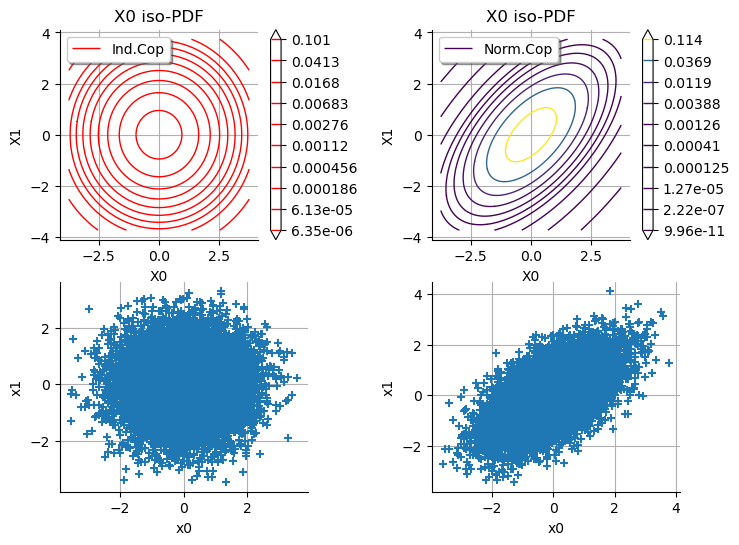

In [34]:
grid = createGridFromGraphList([ind_cop_pdf, norm_cop_pdf, graph1, graph2])
_ = otv.View(grid, figure_kw={"figsize": (8.0, 6.0)})
plt.subplots_adjust(wspace=0.5)